<a href="https://colab.research.google.com/github/HugoETB/Ciencia-de-Datos-UNAD/blob/main/ArbolesdeDecision_Hugo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
--- Análisis Exploratorio de Datos ---
Descripción estadística:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.

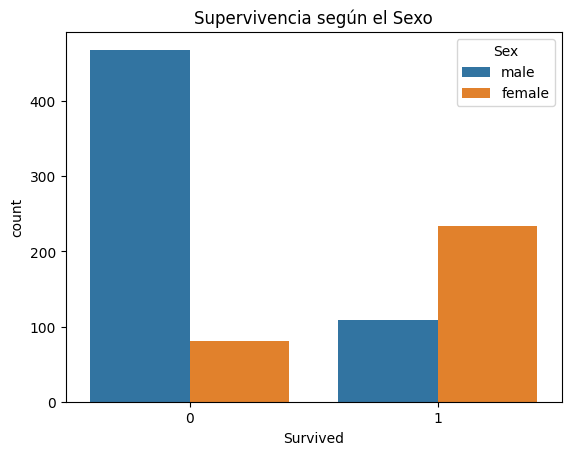


Valores faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--- Preprocesamiento de Datos ---
Datos preprocesados:
[[ 0.82737724  0.73769513 -0.56573646  0.43279337 -0.47367361 -0.50244517
   0.58111394]
 [-1.56610693 -1.35557354  0.66386103  0.43279337 -0.47367361  0.78684529
  -1.93846038]
 [ 0.82737724 -1.35557354 -0.25833709 -0.4745452  -0.47367361 -0.48885426
   0.58111394]
 [-1.56610693 -1.35557354  0.4333115   0.43279337 -0.47367361  0.42073024
   0.58111394]
 [ 0.82737724  0.73769513  0.4333115  -0.4745452  -0.47367361 -0.48633742
   0.58111394]]
--- Selección de Características ---
Características seleccionadas:
[0 1 4 5 6]
--- División en Train y Test ---
Tamaño de Train: 712
Tamaño de Test: 179
--- Entrenamiento del Modelo ---
Modelo entrenado.
--- Evaluación del Modelo ---
Pre

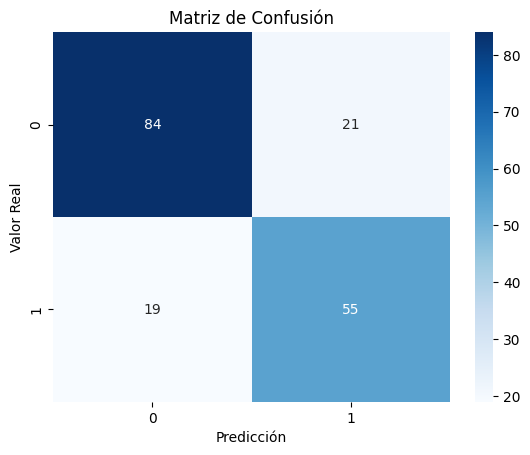

--- Interpretación y Análisis de Resultados ---
Las variables más importantes son:
[0 1 4 5 6]


In [2]:
# Montar Google Drive y configurar el directorio de trabajo
from google.colab import drive
drive.mount('/content/drive')

# Cambiar al directorio que contiene los datos
import os
os.chdir("/content/drive/MyDrive/Dataset/")

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Leer el conjunto de datos del Titanic (Titanic-Dataset.csv)
datos_titanic = pd.read_csv('Titanic-Dataset.csv')

# 1. Análisis Exploratorio de Datos
print("--- Análisis Exploratorio de Datos ---")
print("Descripción estadística:")
print(datos_titanic.describe())

# Seleccionar solo las columnas numéricas para la matriz de correlación
columnas_numericas = datos_titanic.select_dtypes(include=[np.number]).columns
print("\nMatriz de correlación:")
print(datos_titanic[columnas_numericas].corr())

sns.countplot(x='Survived', hue='Sex', data=datos_titanic)
plt.title('Supervivencia según el Sexo')
plt.show()

# Verificar valores faltantes
print("\nValores faltantes:")
print(datos_titanic.isnull().sum())

# 2. Preprocesamiento de Datos
print("--- Preprocesamiento de Datos ---")
# Eliminar columnas innecesarias
datos_titanic = datos_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
datos_titanic['Sex'] = label_encoder.fit_transform(datos_titanic['Sex'])
datos_titanic['Embarked'] = label_encoder.fit_transform(datos_titanic['Embarked'].astype(str))

# Imputar valores faltantes con la mediana
datos_titanic = datos_titanic.fillna(datos_titanic.median())

X = datos_titanic.drop('Survived', axis=1)
y = datos_titanic['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Datos preprocesados:")
print(X[:5])

# 3. Selección de Características
print("--- Selección de Características ---")
selector = SelectKBest(f_classif, k=5)
X = selector.fit_transform(X, y)

print("Características seleccionadas:")
print(selector.get_support(indices=True))

# 4. División en Train y Test
print("--- División en Train y Test ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de Train: {X_train.shape[0]}")
print(f"Tamaño de Test: {X_test.shape[0]}")

# 5. Entrenamiento del Modelo
print("--- Entrenamiento del Modelo ---")
clf = LogisticRegression()
clf.fit(X_train, y_train)

print("Modelo entrenado.")

# 6. Evaluación del Modelo
print("--- Evaluación del Modelo ---")
y_pred = clf.predict(X_test)

print(f"Precisión: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precisión (clase positiva): {precision_score(y_test, y_pred):.3f}")
print(f"Sensibilidad: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

# 7. Gráficas de Resultados
print("--- Gráficas de Resultados ---")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# 8. Interpretación y Análisis de Resultados
print("--- Interpretación y Análisis de Resultados ---")
print("Las variables más importantes son:")
print(selector.get_support(indices=True))

